In [1]:
import os
import glob
import pandas as pd
import dabest

print("We're using DABEST v{}".format(dabest.__version__))



# from scipy import stats

# import seaborn as sns
# import matplotlib.pyplot as plt

We're using DABEST v0.2.4


In [2]:
pwd

'/Users/michaelpiacentino/Drive/git/data/nSMase2/MigrationArea'

In [3]:
# Add analysis date here to apply to dataframe
analysis_date = '20190612'

path = os.path.abspath('')+'/CSVs/'
full_df = pd.DataFrame()
list_ = []

# For loop to bring in files and concatenate them into a single dataframe
for file_ in glob.glob(path + "/*.csv"):
    df = pd.read_csv(file_)
    # Determine Image name from file name
    df['Image'] = os.path.splitext(os.path.basename(file_))[0]
    # Split values in ROI label and Image name columns
    df['delete1'], df['ROI'], df['delete2'], df['delete3'] = zip(*df['Label'].map(lambda x: x.split(':')))
    (df['ExptDate'], df['Treatment'], df['Dose'], df['Stains'], df['Embryo'], 
        df['Somites'], df['ImageMag']) = zip(*df['Image'].map(lambda x: x.split('_')))
    list_.append(df)

full_df = pd.concat(list_)
full_df = full_df.drop(['Label', 'Mean', 'IntDen', 'RawIntDen', 'delete1', 'delete2', 'delete3'], axis=1)
full_df.head()

,,Area,Image,ROI,ExptDate,Treatment,Dose,Stains,Embryo,Somites,ImageMag
0,1,72103.705,"20180715_SMPD3MONC11m3bCat_0,8mM2ugul_Pax7GFP_...",CntlArea,20180715,SMPD3MONC11m3bCat,"0,8mM2ugul",Pax7GFP,Emb6,8ss,10x
1,2,23918.319,"20180715_SMPD3MONC11m3bCat_0,8mM2ugul_Pax7GFP_...",ExptArea,20180715,SMPD3MONC11m3bCat,"0,8mM2ugul",Pax7GFP,Emb6,8ss,10x
0,1,80452.846,"20180630_SMPD3MO_0,8mM_Pax7_Emb5_8ss_10x",CntlArea,20180630,SMPD3MO,"0,8mM",Pax7,Emb5,8ss,10x
1,2,47922.588,"20180630_SMPD3MO_0,8mM_Pax7_Emb5_8ss_10x",ExptArea,20180630,SMPD3MO,"0,8mM",Pax7,Emb5,8ss,10x
0,1,47346.082,"20181119_SMPD3MO_0,6mM_Pax7_Emb6_7ss_10x",CntlArea,20181119,SMPD3MO,"0,6mM",Pax7,Emb6,7ss,10x


In [4]:
# Get a list of treatments
treatment_list = full_df.Treatment.unique()
treatment_list = treatment_list.tolist()

# Group dataframe by treatment
df_byTreatment = full_df.groupby(['Treatment', 'Image', 'ROI'])['Image', 'ROI', 'Area', 'Treatment'].mean()

# Loop trough treatments, performing each analysis and exporting CSV file for each treatment
for i in treatment_list:
    # Slice dataframe to process only embryos with given treatment
    treatment = i
    df_treatment = pd.DataFrame(df_byTreatment.xs(treatment))

    # Extract Cntl and Expt areas
    area_cntl = df_treatment.xs('CntlArea', level='ROI')
    area_expt = df_treatment.xs('ExptArea', level='ROI')

    # Generate Expt/Cntl Area Ratios
    area_ratios = pd.DataFrame(area_expt / area_cntl)
    area_ratios.columns = ['Expt/Cntl Area']

    # Normalize all migration area values to mean of control group
    norm_cntl = area_cntl/(float(area_cntl.mean()))
    norm_cntl.columns = ['Norm Cntl Area']
    norm_expt = area_expt/(float(area_cntl.mean()))
    norm_expt.columns = ['Norm Expt Area']
    norm_areas = pd.concat([norm_cntl, norm_expt], axis=1, sort=False)

    # Combine processed values into single dataframe and output as csv file analysis date + 'MigrationResults.csv'
    area_cntl = pd.DataFrame(area_cntl)
    area_cntl.columns = ['Cntl Area']
    area_expt = pd.DataFrame(area_expt)
    area_expt.columns = ['Expt Area']
    results = pd.concat([area_cntl, area_expt, area_ratios, norm_cntl, norm_expt], axis=1, sort=True)
    results.to_csv(analysis_date + '_' + treatment + '_MigrationResults.csv')
    
results

,Cntl Area,Expt Area,Expt/Cntl Area,Norm Cntl Area,Norm Expt Area
Image,,,,,
20171016_SMPD3gRNA1DNA_2ugul_Pax7Sox9_Emb2_7ss_10x,75291.301,51738.422,0.687177,0.886079,0.608893
20171016_SMPD3gRNA1DNA_2ugul_Pax7Sox9_Emb5_9ss_10x,80357.839,88925.670,1.106621,0.945706,1.046538
20171016_SMPD3gRNA1DNA_2ugul_Pax7Sox9_Emb9_9ss_10x,83373.317,77197.874,0.925930,0.981194,0.908517
20180418_SMPD3gRNA1DNA_2ugul_Pax7NcadLaminin_Emb1_8ss_10x,71843.804,51341.649,0.714629,0.845507,0.604224
20180418_SMPD3gRNA1DNA_2ugul_Pax7NcadLaminin_Emb5_9ss_10x,107900.300,65898.593,0.610736,1.269844,0.775540
20180418_SMPD3gRNA1DNA_2ugul_Pax7NcadLaminin_Emb7_8ss_10x,53975.605,34435.805,0.637988,0.635222,0.405264
20180418_SMPD3gRNA1DNA_2ugul_Snai2Cad6b_Emb2_9ss_10x,116946.527,81341.425,0.695544,1.376306,0.957281
20180418_SMPD3gRNA1DNA_2ugul_Snai2Cad6b_Emb4_8ss_10x,90081.569,58247.154,0.646605,1.060141,0.685492


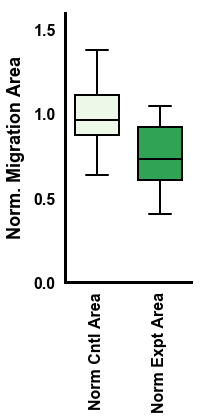

In [6]:
# Build our plot of these data

# first, define figure size and style
plt.figure(figsize=(3,6))
sns.set(style='white'
        ,rc={'font.family':'sans-serif'
             ,'axes.edgecolor':'black'
            }
       )
            
# customize style and text on each axis
plt.xticks(size=16
           ,weight='bold'
           ,color='black'
           ,rotation='vertical')
plt.ylim(0,1.6)
plt.yticks([0, 0.5, 1, 1.5]
           ,size=16
           ,weight='bold'
           ,color='black'
          )
plt.ylabel('Norm. Migration Area'
           ,size=18
           ,weight='bold'
           ,color='black'
           ,labelpad=8
          )

# make color palate to label each dataset
# add more colors if using more datasets
my_pal = ('#EDF8E9','#30A354')

# finally, make the boxplot
myplot = sns.boxplot(data=results.iloc[:,3:5]
                     ,palette=my_pal
                     ,saturation=1
                     ,width=0.7
                     ,boxprops = {'edgecolor': 'black', 'linewidth': 2}
                     ,whiskerprops = {'color': 'black', 'linewidth':2}
                     ,medianprops = {'color': 'black', 'linewidth':2}
                     ,capprops = {'color': 'black', 'linewidth':2}
                )

# use this segment if you want to add a jitterplot overtop of the box plot
# myplot = sns.swarmplot(data=results.iloc[:,5:7], 
#               color='#252525',
#               size=8)

# adjust the axes around the box: despine to remove the top and right line, then for loop to update the x- and y-axis
sns.despine()
for axis in ['top','bottom','left','right']:
    myplot.spines[axis].set_linewidth(3)
    
# tighten the figure boundaries to the graph
plt.tight_layout()

In [ ]:
# Get descriptive statistics
mean = results.mean()
sem = results.sem()
corr = results.corr()
print(mean)
print(sem)
print(corr)

# Perform two-tailed paired ttest from results
ttest = stats.ttest_rel(results['Control MO'], results['nSMase2 MO'])
print(ttest)

In [5]:
df = pd.read_csv('20190612_SMPD3MO_MigrationResults.csv')
df.head()

,Image,Cntl Area,Expt Area,Expt/Cntl Area,Norm Cntl Area,Norm Expt Area
0,"20180514_SMPD3MO_0,8mM_Pax7Laminin_Emb12_8ss_10x",116506.057,53329.019,0.457736,1.383249,0.633163
1,"20180514_SMPD3MO_0,8mM_Pax7Laminin_Emb13_8ss_10x",97302.020,40681.740,0.418098,1.155244,0.483005
2,"20180514_SMPD3MO_0,8mM_Pax7Laminin_Emb1_8ss_10x",129671.718,61209.660,0.472036,1.539561,0.726728
3,"20180514_SMPD3MO_0,8mM_Pax7Laminin_Emb3_9ss_10x",173182.400,121514.470,0.701656,2.056153,1.442712
4,"20180514_SMPD3MO_0,8mM_Pax7Laminin_Emb6_8ss_10x",72508.322,52025.129,0.717506,0.860874,0.617682


In [9]:
fig1, stats = dabest.effsize(df
                          ,idx=('Norm Cntl Area', 'Norm Expt Area')
                          ,paired=True
                          ,show_pairs=True #defines paired analysis, but shows individual plots
                          ,id_col='Image' #need to define an ID column for a paired analysis
                          ,show_group_count=False                        
                          ,font_scale=0.8
                          ,dpi=100
                          ,fig_size=(3,6)
                          ,tick_length=10
                          ,float_contrast=True
                          ,swarm_dotsize=10
                          ,summary_linewidth=10
                          ,ci_linewidth=2
                          ,swarm_label='Norm. Migration Area'
                          ,contrast_label='Estimation Plot'
#                           ,swarm_ylim=(0,1.6)
                )
stats

TypeError: 'module' object is not callable

In [9]:
fig1.savefig('smpd3MOMigration.jpg')

In [ ]:
fig1, stat